#DETECCIÓN DE GRITOS MODELO CNN - PRUEBA

###Importación de Librerias

In [1]:
import numpy as np
import librosa

import IPython.display as ipd
from matplotlib import pyplot
from tensorflow.keras.models import load_model

###Función para obtener las caracteristicas del sonido

In [4]:
def grab_sound_features(filename):
    sample_rate = 12000
    duration = 3

    # Cargamos el audio
    X, sample_rate = librosa.load(filename, sr=sample_rate, res_type='kaiser_fast')
    
    return librosa.feature.melspectrogram(y=X, sr=sample_rate).transpose()

###Se carga y ejecuta el modelo para predicción

In [2]:
model = load_model('scream_cnn.h5')

In [30]:
filename = 'SpiderMan.wav'
X = grab_sound_features(filename)
X2 = X[None,:]
result = model.predict(X2)

###Se muestra en que parte del audio detecta gritos el modelo

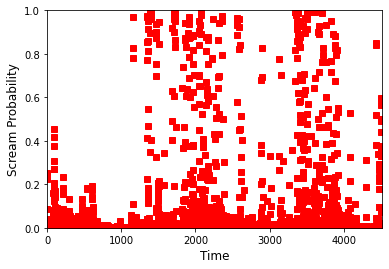

In [33]:
pyplot.plot(result[0,:,1], 'rs')
pyplot.xlabel('Time', fontsize = 12)
pyplot.ylabel('Scream Probability', fontsize = 12)
pyplot.axis([0, result.shape[1], 0, 1])
pyplot.show()
ipd.Audio(filename)